# Customer Segmentation for Marketing

Marketing is crucial for the growth and sustainability of any business. Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales. One of the key pain points for marketers is to know their customers and identify their needs. By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs. If data about the customers is available, data science can be applied to perform market segmentation.

### About this Project 

* Successfully implemented Optimization for marketing strategy by performing customer segmentation on the given dataset.
* Performed exploratory data analysis and visualize customer dataset using distplots, histogram and KDE.
* Used elbow method to find the optimal number of clusters and applied K means clustering algorithm.
* Build and trained autoencoder models in keras, applied PCA to perform dimensionality reduction using the datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df=pd.read_csv('Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df_original=df.copy()

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [6]:
df[df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Data Visualization 

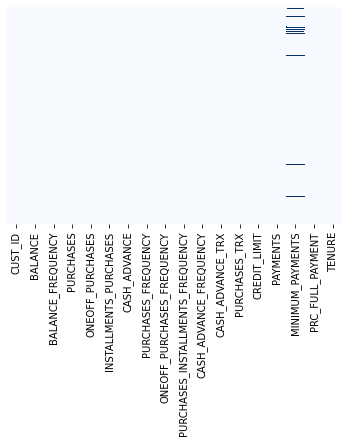

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='Blues')

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df.fillna(df.mean(),inplace=True)

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

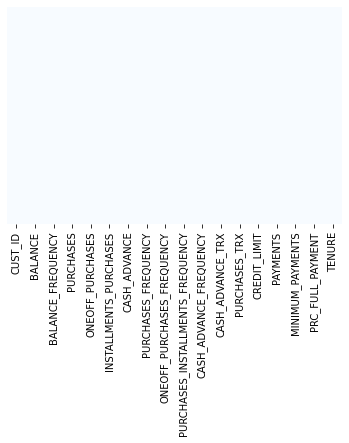

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='Blues')

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop('CUST_ID', axis='columns', inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
df.shape

(8950, 17)

In [17]:
columns=df.columns

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

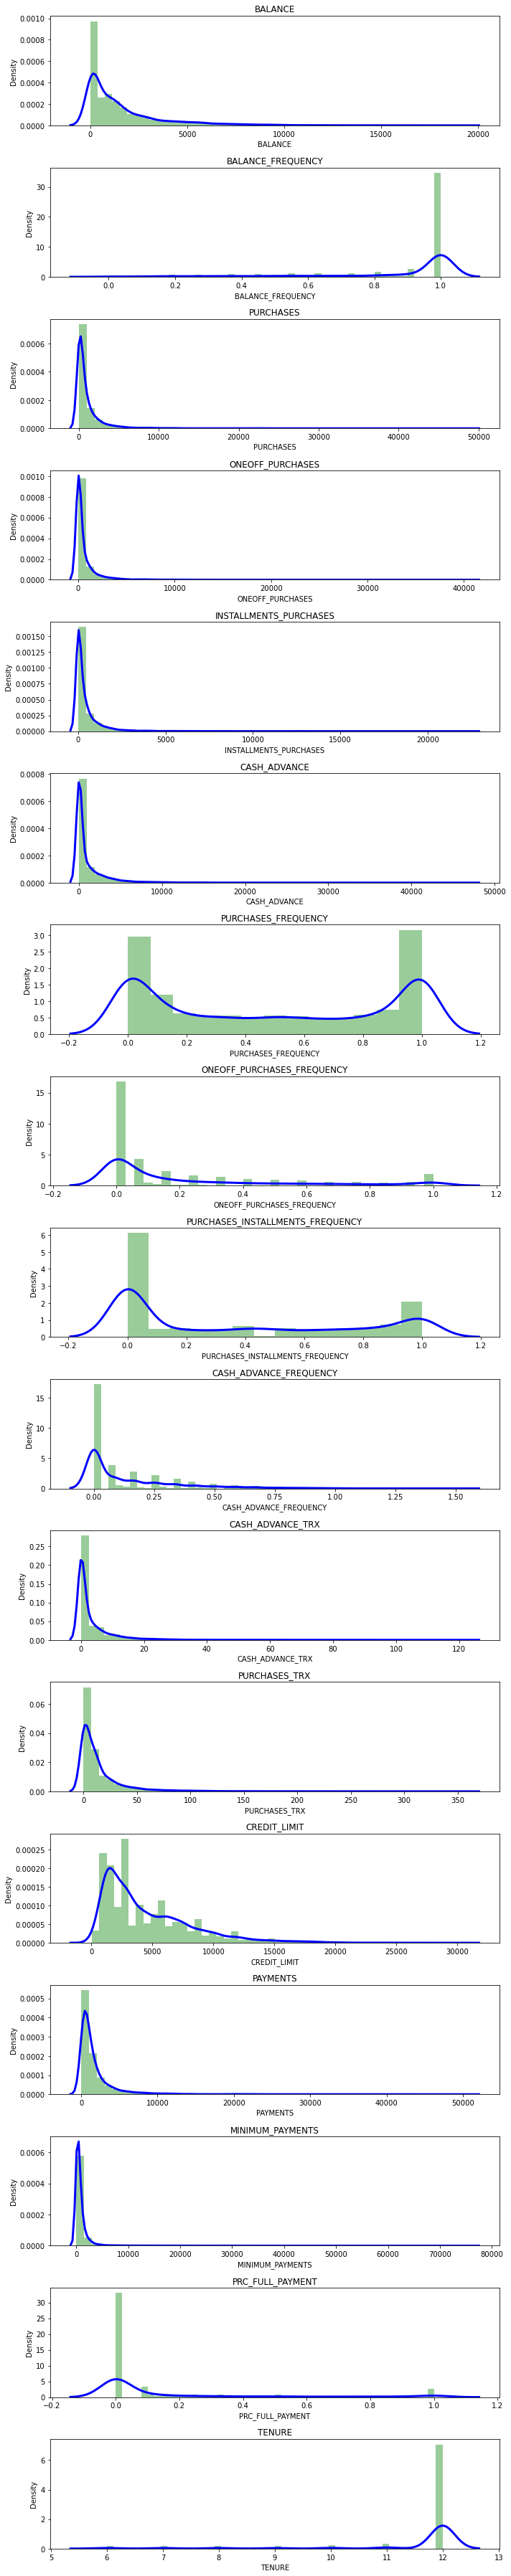

In [18]:
plt.figure(figsize=(10,50))

for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'} , hist_kws={'color':'g'})
    plt.title(df.columns[i])
    
plt.tight_layout()

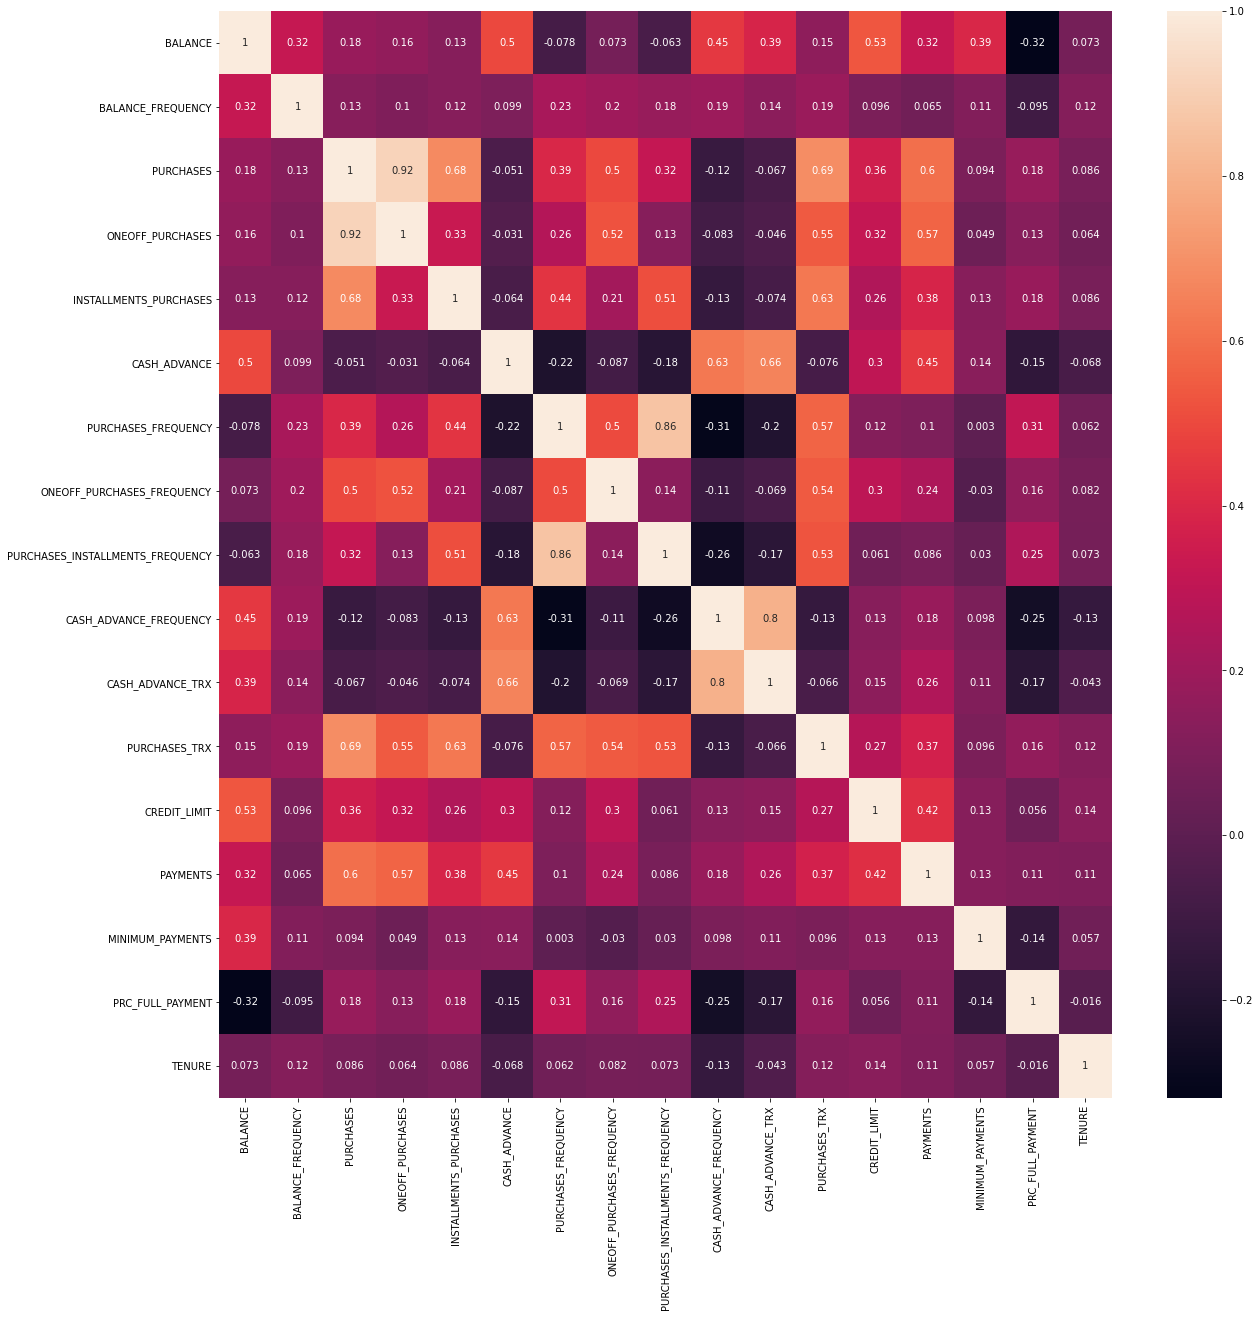

In [19]:
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

#### Optimal K calculation using Elbow Method 

In [20]:
scaler= StandardScaler()
df=scaler.fit_transform(df)

In [21]:
df.shape

(8950, 17)

In [22]:
df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [23]:
score_1=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    score_1.append(kmeans.inertia_)
    
    

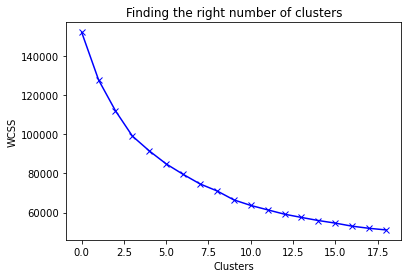

In [24]:
plt.plot(score_1,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

#### K-Means Clustering 

In [25]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(df)
labels=kmeans.labels_

In [26]:
labels

array([1, 2, 5, ..., 0, 0, 0])

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_, columns=[columns])

In [29]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
1,0.007008,0.403734,-0.354201,-0.238705,-0.398851,-0.104332,-0.840919,-0.382533,-0.751003,0.087079,-0.039700,-0.477484,-0.307208,-0.253251,-0.008268,-0.455566,0.273533
2,1.658847,0.395708,-0.223107,-0.158511,-0.236387,1.989156,-0.486259,-0.213791,-0.426821,1.917424,1.914163,-0.273385,1.005130,0.791922,0.501101,-0.395455,0.074055
3,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173308,-0.191875,-0.256477,0.285369,0.200376
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,-0.117538,0.402699,0.580581,0.704443,0.078392,-0.332406,0.998287,1.914808,0.212951,-0.420466,-0.335135,0.665746,0.469808,0.172989,-0.155272,0.462860,0.274996
6,-0.361686,0.331481,-0.030326,-0.240393,0.369743,-0.361558,0.995615,-0.379984,1.206443,-0.471283,-0.359117,0.194052,-0.260447,-0.212928,-0.050942,0.315555,0.255413
7,1.110263,0.475718,2.571220,1.837775,2.703405,-0.125136,1.170408,1.551592,1.294742,-0.265418,-0.124742,3.223166,1.330785,1.513267,0.809454,0.237560,0.335543


In [30]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
1,1579.060896,0.972912,246.448453,196.236465,50.391228,760.081351,0.152849,0.088341,0.065970,0.152570,2.977907,2.841362,3376.699264,1000.007089,844.937864,0.020469,11.883376
2,5017.223872,0.971010,526.533161,329.341406,197.306119,5150.225056,0.295191,0.138680,0.194808,0.518840,16.311586,7.914511,8151.523673,4025.680308,2032.001259,0.038051,11.616423
3,105.815587,0.370044,341.205363,203.518742,137.937297,307.546906,0.267910,0.070955,0.189683,0.030884,0.680743,4.304899,3863.884666,1177.685781,266.498413,0.237180,11.785473
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,1319.829025,0.972666,2243.625369,1761.668658,481.956711,281.800513,0.891011,0.773682,0.449070,0.051005,0.961778,31.257778,6203.802020,2233.929086,502.351453,0.289093,11.885333
6,811.656098,0.955796,938.413323,193.434747,745.421672,220.666395,0.889939,0.089101,0.843908,0.040836,0.798115,19.533234,3546.835418,1116.738167,745.489157,0.246009,11.859127
7,3875.394281,0.989964,6496.656972,3642.768196,2855.723639,716.455532,0.960092,0.665328,0.879001,0.082031,2.397554,94.825688,9336.391437,6113.904331,2750.604313,0.223197,11.966361


In [31]:
labels.shape

(8950,)

In [32]:
labels.max()

7

In [33]:
labels.min()

0

In [34]:
label=pd.DataFrame({'cluster':labels})
label

,cluster
0,1
1,2
2,5
3,1
4,1
...,...
8945,0
8946,0
8947,0
8948,0


In [35]:
df_cluster=pd.concat([df_original.drop('CUST_ID',axis=1),label],axis=1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


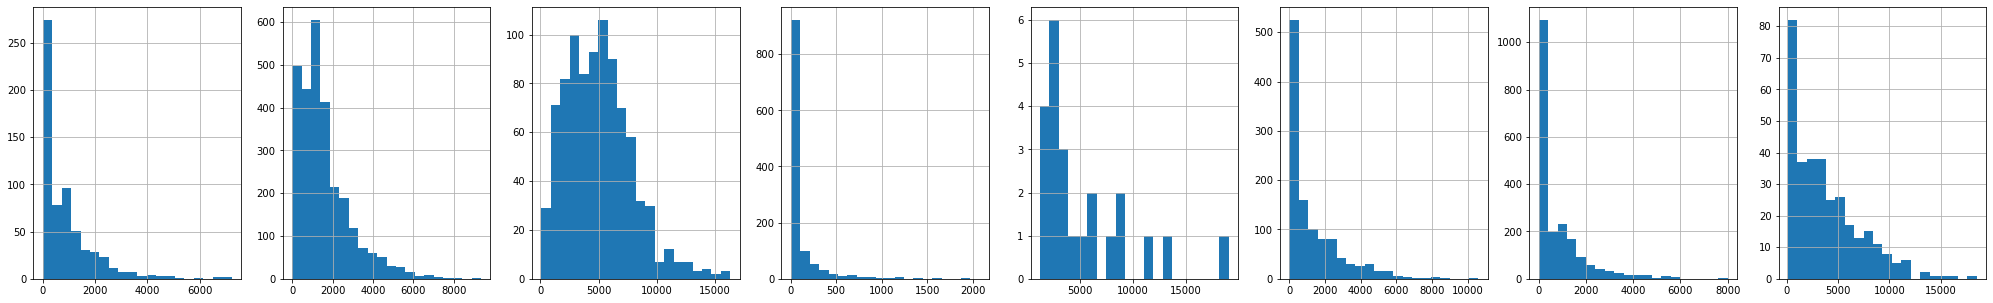

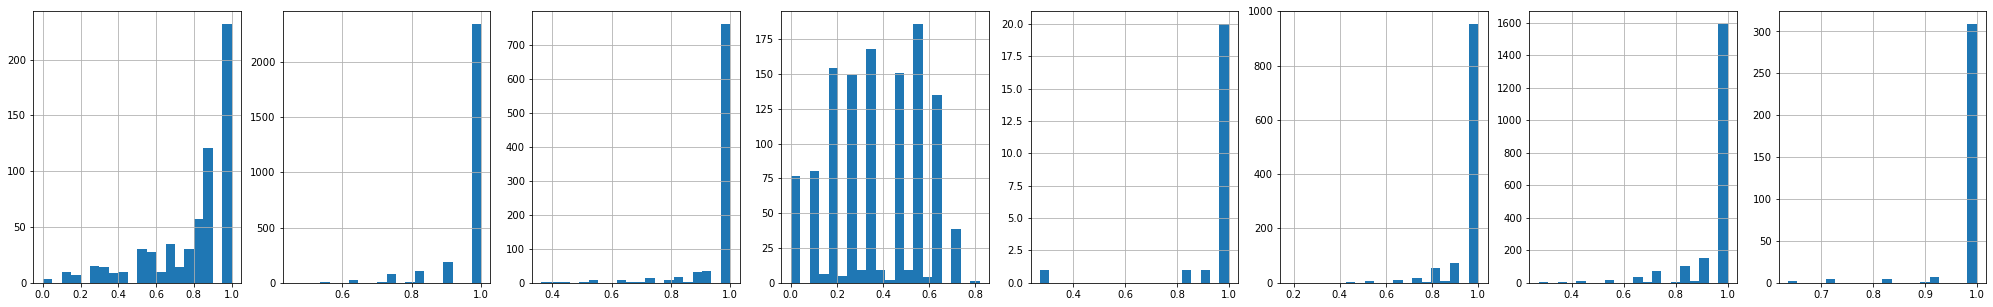

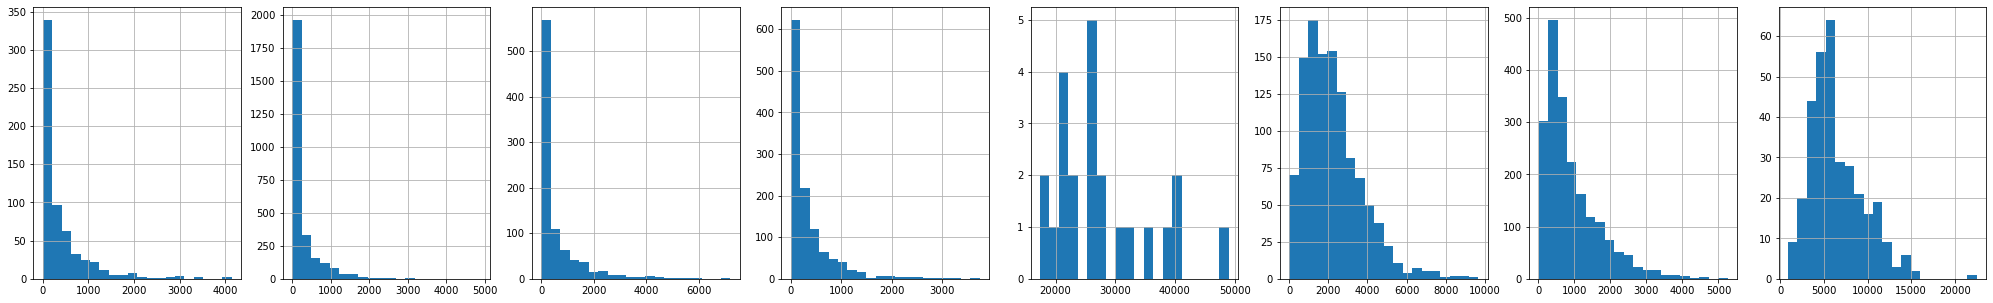

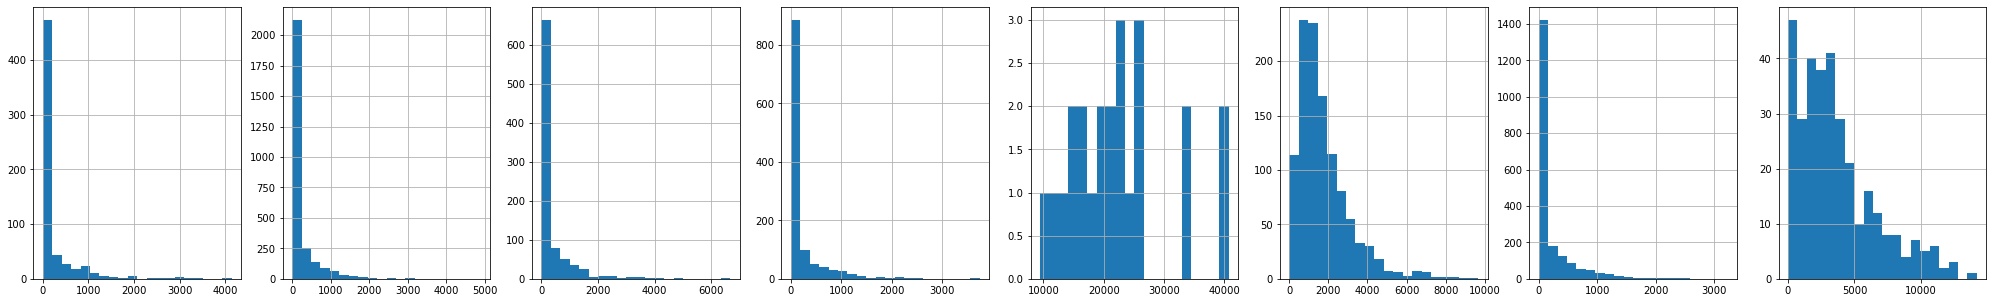

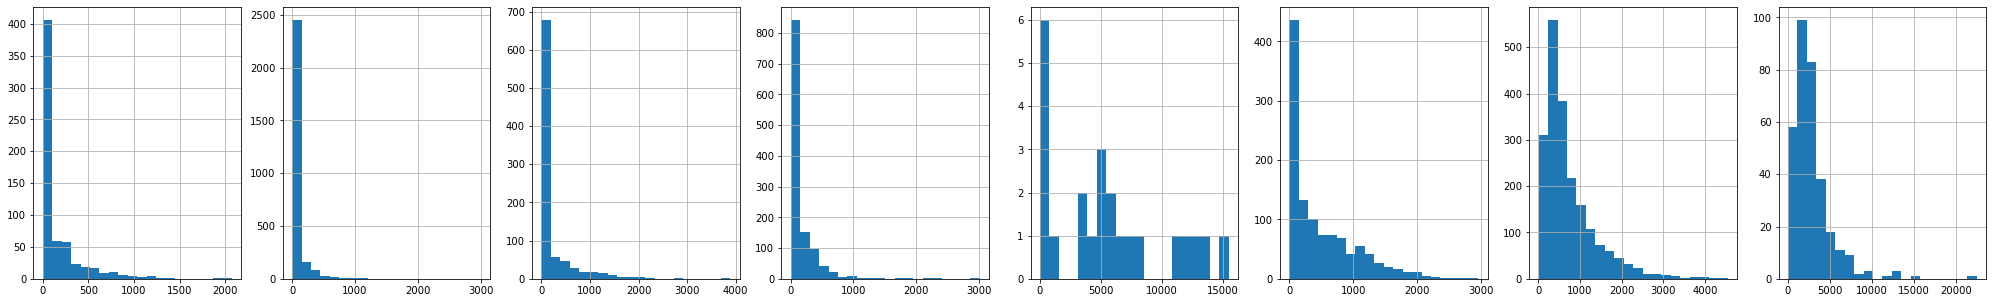

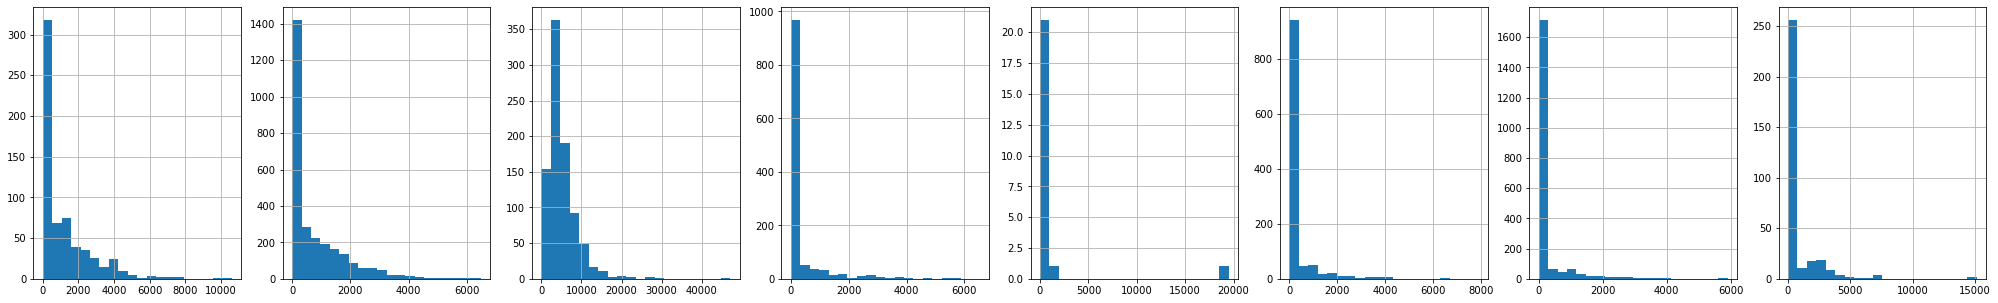

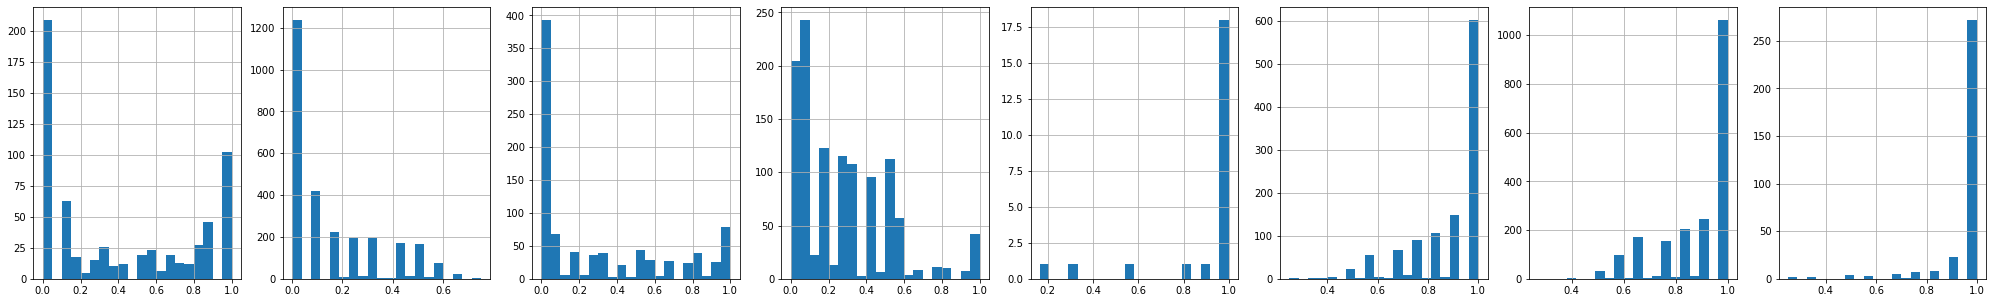

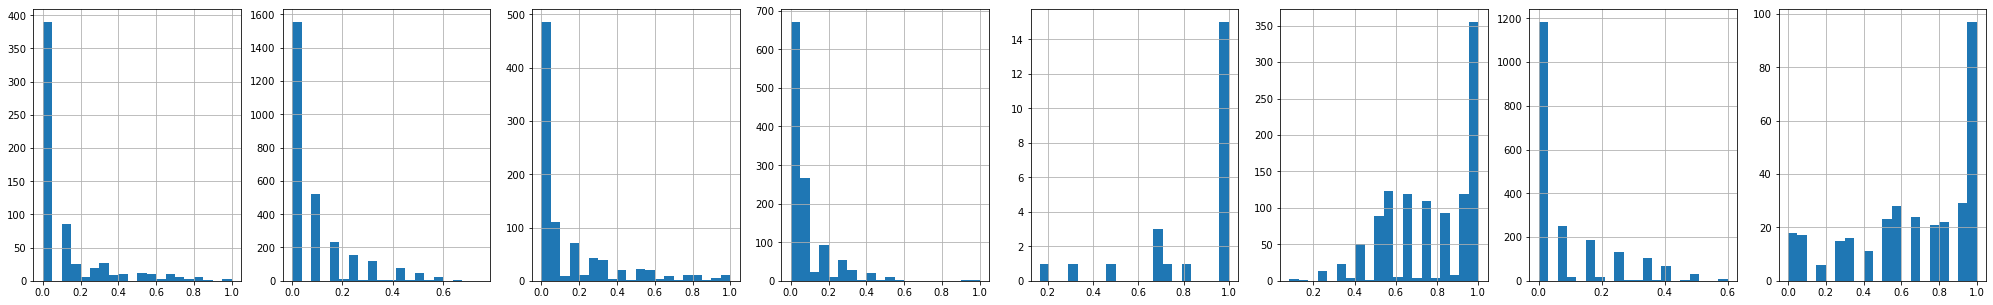

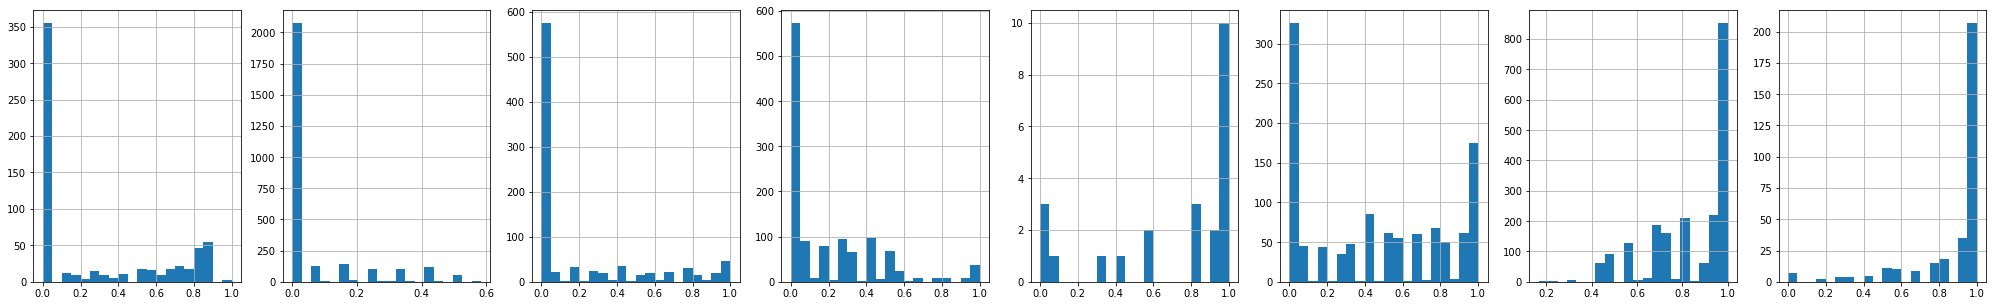

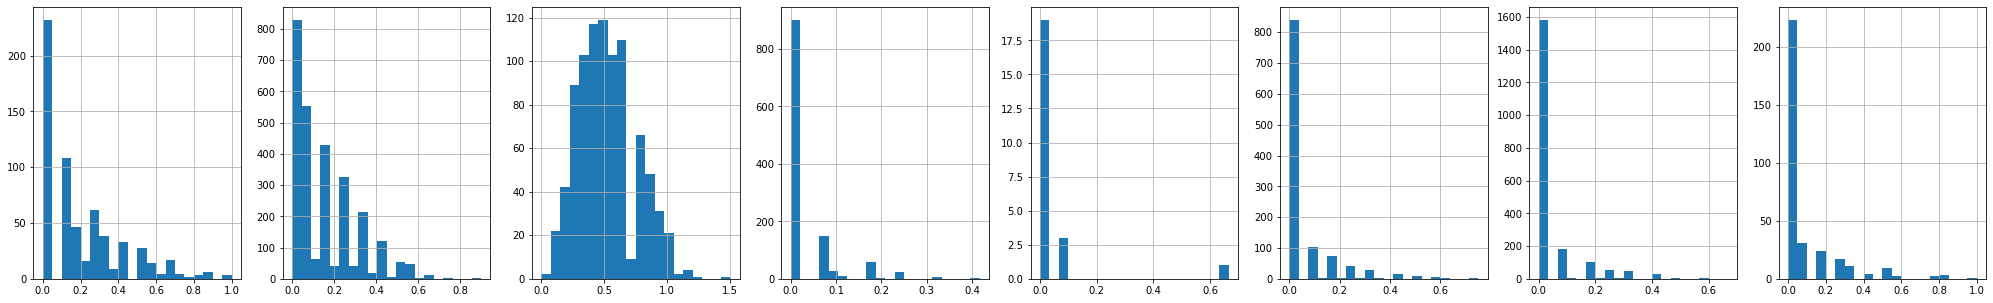

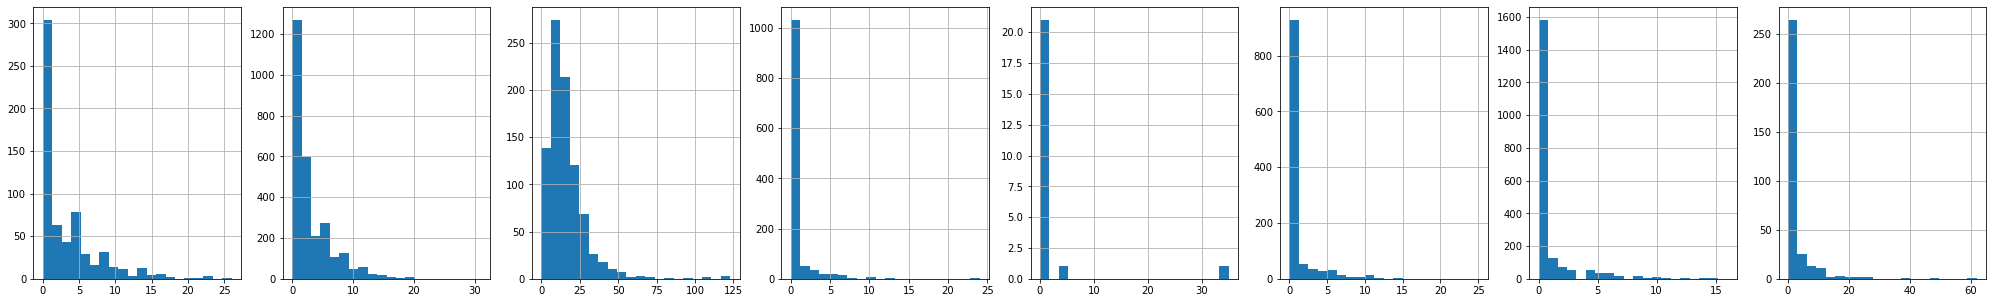

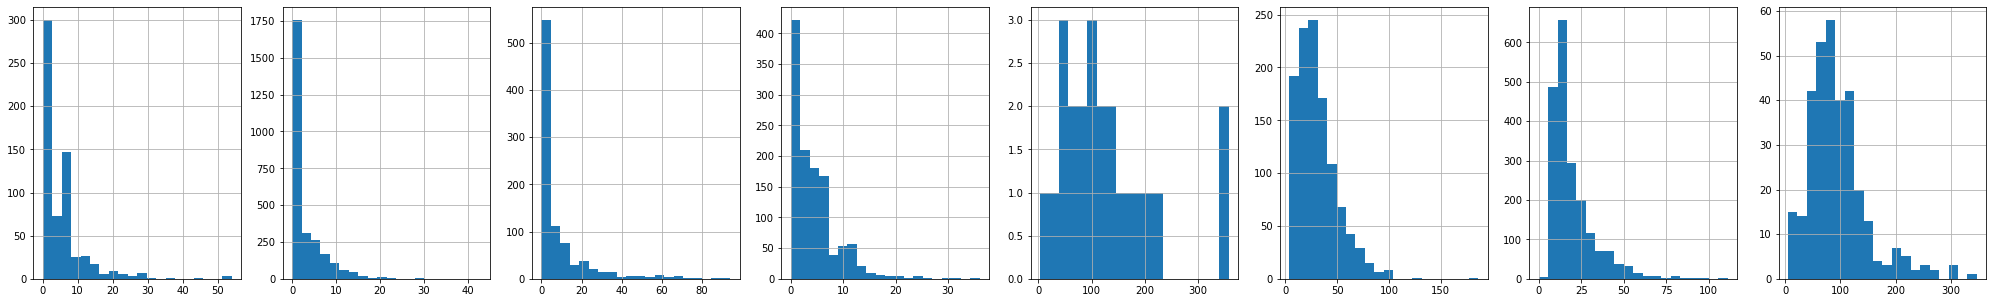

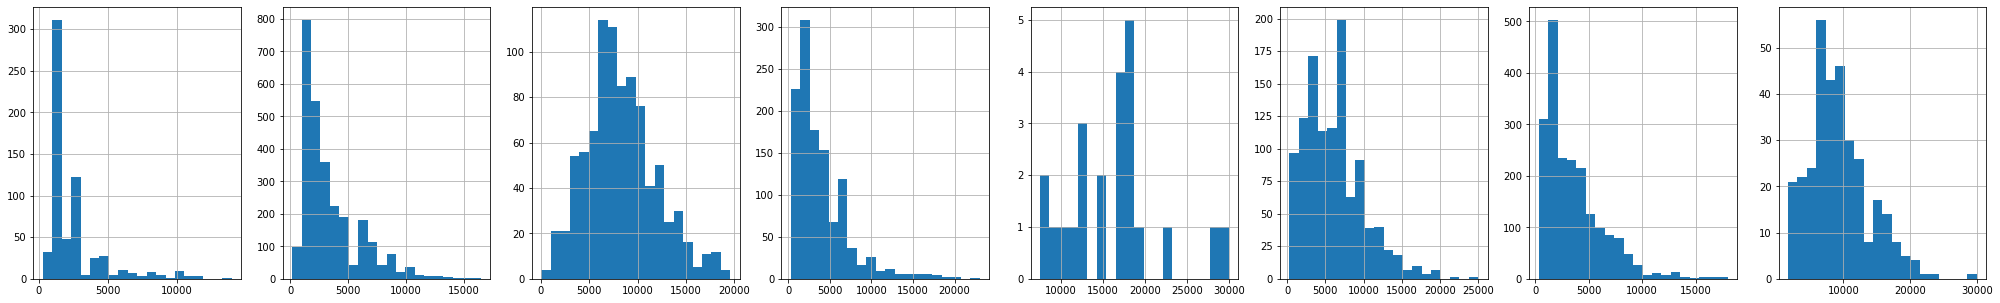

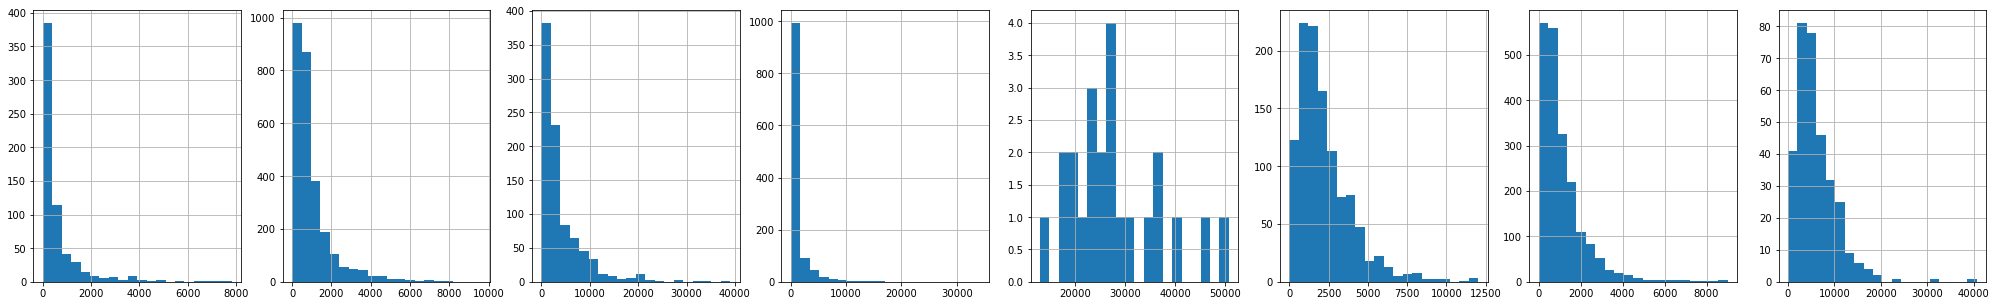

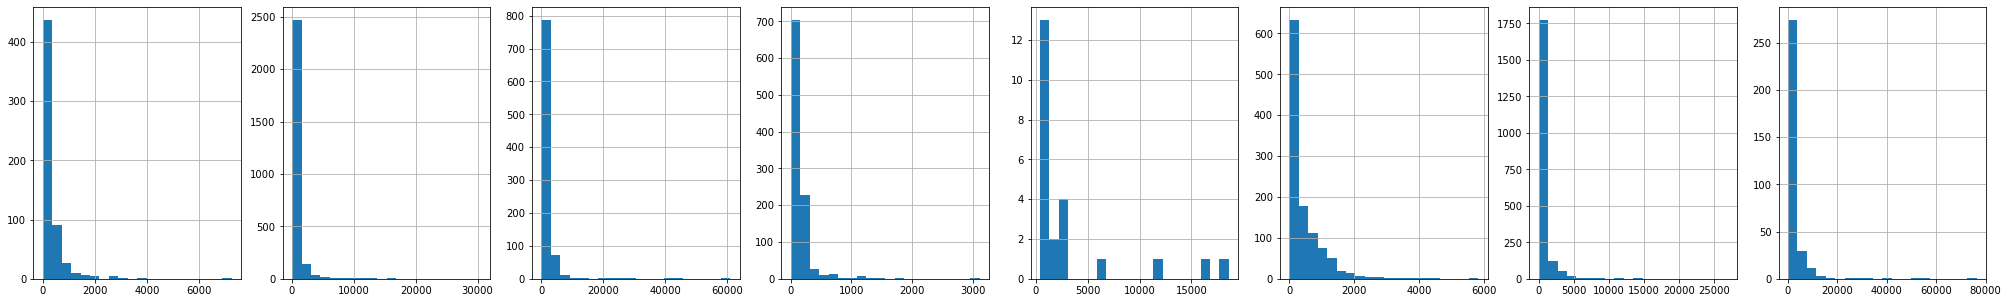

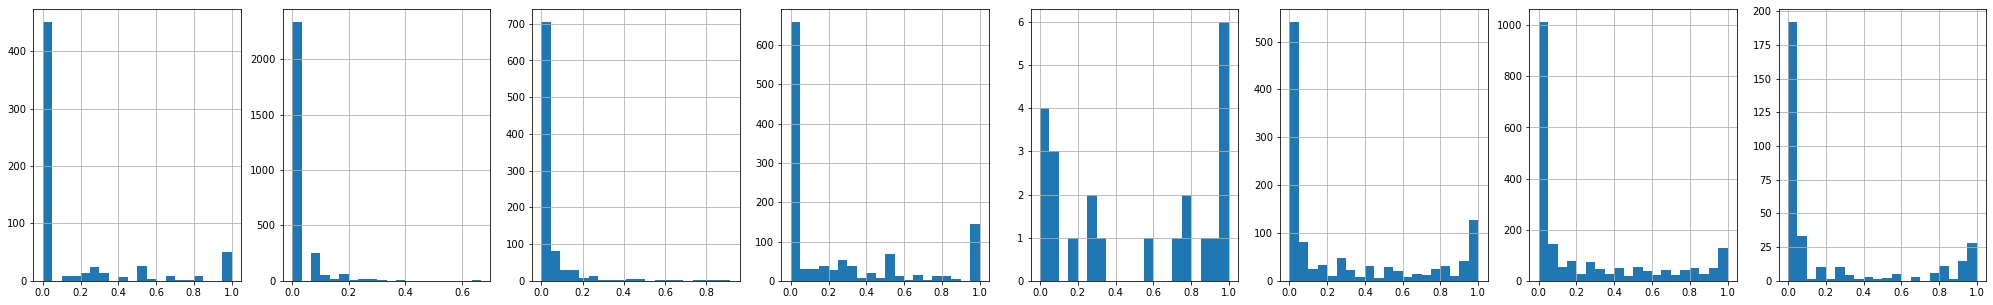

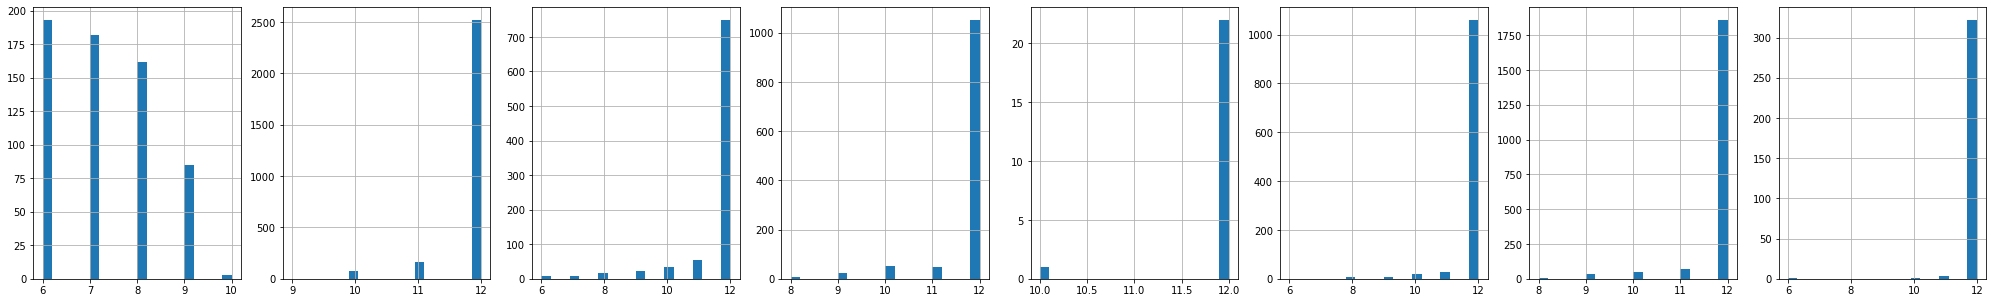

In [36]:
for i in columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        
plt.show()

#### PCA 

In [38]:
pca=PCA(n_components=2)
pc_component=pca.fit_transform(df)
pc_component

array([[-1.68222044, -1.0764478 ],
       [-1.13829792,  2.50648111],
       [ 0.96968748, -0.38354126],
       ...,
       [-0.92620272, -1.81078171],
       [-2.33655192, -0.65795639],
       [-0.55642212, -0.40047194]])

In [39]:
pc_dataframe=pd.DataFrame(pc_component,columns=['PCA1','PCA2'])

In [40]:
pc_dataframe

,PCA1,PCA2
0,-1.682220,-1.076448
1,-1.138298,2.506481
2,0.969687,-0.383541
3,-0.873629,0.043170
4,-1.599433,-0.688579
...,...,...
8945,-0.359628,-2.016143
8946,-0.564369,-1.639113
8947,-0.926203,-1.810782
8948,-2.336552,-0.657956


In [41]:
pca_df=pd.concat([pc_dataframe,label],axis=1)
pca_df

,PCA1,PCA2,cluster
0,-1.682220,-1.076448,1
1,-1.138298,2.506481,2
2,0.969687,-0.383541,5
3,-0.873629,0.043170,1
4,-1.599433,-0.688579,1
...,...,...,...
8945,-0.359628,-2.016143,0
8946,-0.564369,-1.639113,0
8947,-0.926203,-1.810782,0
8948,-2.336552,-0.657956,0


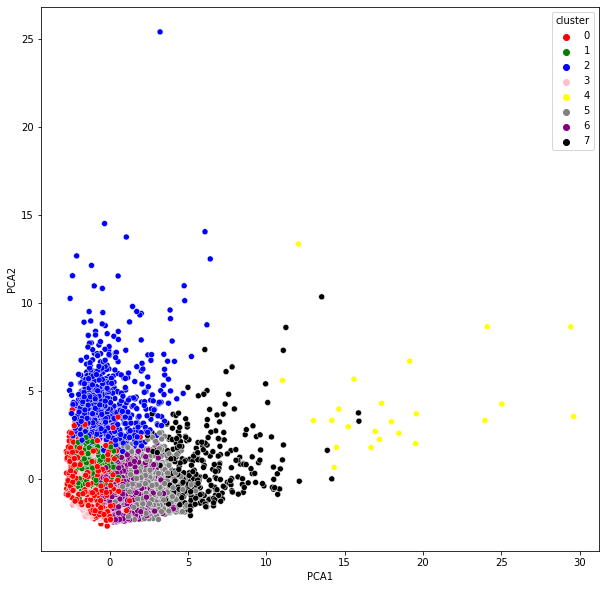

In [42]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df,palette=['red','green','blue','pink','yellow','grey','purple','black'])

#### Auto Encoders 

In [43]:
df.shape

(8950, 17)

In [44]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [45]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [46]:
autoencoder.fit(df,df,batch_size=128,epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 36ms/step - loss: 0.5783
Epoch 2/25
70/70 [==============================] - 3s 40ms/step - loss: 0.3155
Epoch 3/25
70/70 [==============================] - 4s 51ms/step - loss: 0.2421: 0s - 
Epoch 4/25
70/70 [==============================] - 3s 39ms/step - loss: 0.2278
Epoch 5/25
70/70 [==============================] - 3s 47ms/step - loss: 0.1601
Epoch 6/25
70/70 [==============================] - 3s 43ms/step - loss: 0.1525
Epoch 7/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1277
Epoch 8/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1215
Epoch 9/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1122: 1s 
Epoch 10/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1103
Epoch 11/25
70/70 [==============================] - 3s 37ms/step - loss: 0.0980
Epoch 12/25
70/70 [==============================] - 3s 40ms/step - loss: 0.0966
Epoch 13/25
70/70 [======

In [47]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [48]:
pred=encoder.predict(df)
pred

array([[0.        , 0.49188036, 0.29242733, ..., 0.        , 0.666793  ,
        0.        ],
       [0.        , 1.8595637 , 0.62566906, ..., 0.        , 0.26681787,
        0.        ],
       [0.        , 1.2400597 , 1.742987  , ..., 0.        , 2.0464692 ,
        0.        ],
       ...,
       [0.        , 0.532875  , 1.9671781 , ..., 0.        , 0.92470473,
        0.        ],
       [0.        , 1.2160418 , 0.48885638, ..., 0.        , 0.6035178 ,
        0.        ],
       [0.        , 1.6595305 , 0.48911253, ..., 0.        , 3.2358882 ,
        0.        ]], dtype=float32)

In [49]:
pred.shape

(8950, 10)

In [50]:
score_2=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)
    
    

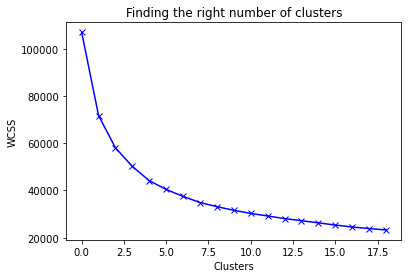

In [51]:
plt.plot(score_2,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

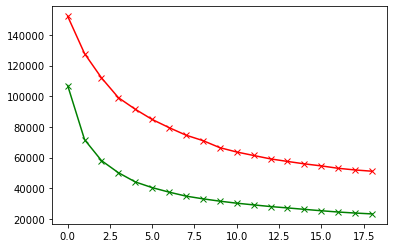

In [52]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(score_2, 'bx-', color = 'g')

In [53]:
kmeans=KMeans(4)
kmeans.fit(pred)
labels=kmeans.labels_

In [56]:
df_cluster = pd.concat([pd.DataFrame(df), pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068,1


In [57]:
pca=PCA(n_components=2)
pc_component=pca.fit_transform(df)
pc_component

array([[-1.68221846, -1.07644565],
       [-1.13830382,  2.50646092],
       [ 0.96968663, -0.38351427],
       ...,
       [-0.92619864, -1.81077527],
       [-2.33654713, -0.65795767],
       [-0.55642599, -0.4004781 ]])

In [59]:
pc_dataframe=pd.DataFrame(pc_component,columns=['PCA1','PCA2'])
pc_dataframe

,PCA1,PCA2
0,-1.682218,-1.076446
1,-1.138304,2.506461
2,0.969687,-0.383514
3,-0.873627,0.043169
4,-1.599431,-0.688574
...,...,...
8945,-0.359625,-2.016137
8946,-0.564362,-1.639108
8947,-0.926199,-1.810775
8948,-2.336547,-0.657958


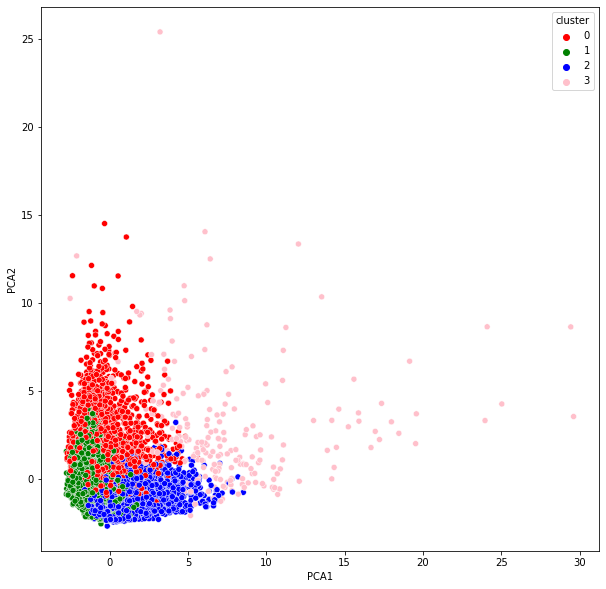

In [62]:
pca_df=pd.concat([pc_dataframe,pd.DataFrame({'cluster':labels})],axis=1)
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df,palette=['red','green','blue','pink'])